# Ethereum Future Price Prediction

## Import Libraries

In [134]:
from datetime import datetime
from datetime import timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [135]:
start_date = '2019-01-01'
today = datetime.today().strftime('%Y-%m-%d')

## Download Data

In [136]:
# eth_df = yf.download("ETH-USD", start_date, today)
# eth_df.tail()

## Data to save in .csv format

In [137]:
# eth_df.to_csv("./datasets/ether.csv")

## Load Data

In [138]:
data = pd.read_csv("./datasets/ether.csv")
data = data.set_index(pd.DatetimeIndex(data['Date'].values))
data

,Date,Open,High,Low,Close,Adj Close,Volume
2018-12-31,2018-12-31,140.031067,140.181152,132.519394,133.368256,133.368256,2358360234
2019-01-01,2019-01-01,133.418152,141.397507,132.650711,140.819412,140.819412,2258709868
2019-01-02,2019-01-02,141.519516,156.929138,140.650955,155.047684,155.047684,3328240369
2019-01-03,2019-01-03,155.196045,155.863052,147.198364,149.135010,149.135010,2676164880
2019-01-04,2019-01-04,148.912888,156.878983,147.907104,154.581940,154.581940,3126192535
...,...,...,...,...,...,...,...
2021-09-04,2021-09-04,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328
2021-09-05,2021-09-05,3886.331055,3979.186523,3838.487305,3952.133545,3952.133545,18371468576
2021-09-06,2021-09-06,3951.520752,3968.426514,3868.994385,3928.379395,3928.379395,18674691198
2021-09-07,2021-09-07,3926.527588,3945.314209,3062.222412,3426.394287,3426.394287,39131346397


In [139]:
# Create a variable for predicting 'n' days in future
future_days = 15

In [140]:
# Create a new column
data[str(future_days)+'_Day_Price_Forecast'] = data[['Close']].shift(-future_days)

In [141]:
# Show Data
data

,Date,Open,High,Low,Close,Adj Close,Volume,15_Day_Price_Forecast
2018-12-31,2018-12-31,140.031067,140.181152,132.519394,133.368256,133.368256,2358360234,122.032715
2019-01-01,2019-01-01,133.418152,141.397507,132.650711,140.819412,140.819412,2258709868,123.547066
2019-01-02,2019-01-02,141.519516,156.929138,140.650955,155.047684,155.047684,3328240369,123.741920
2019-01-03,2019-01-03,155.196045,155.863052,147.198364,149.135010,149.135010,2676164880,121.010262
2019-01-04,2019-01-04,148.912888,156.878983,147.907104,154.581940,154.581940,3126192535,124.519020
...,...,...,...,...,...,...,...,...
2021-09-04,2021-09-04,3937.910156,3969.448730,3837.931152,3887.828369,3887.828369,20806963328,NaN
2021-09-05,2021-09-05,3886.331055,3979.186523,3838.487305,3952.133545,3952.133545,18371468576,NaN
2021-09-06,2021-09-06,3951.520752,3968.426514,3868.994385,3928.379395,3928.379395,18674691198,NaN
2021-09-07,2021-09-07,3926.527588,3945.314209,3062.222412,3426.394287,3426.394287,39131346397,NaN


In [142]:
data.tail(16)

,Date,Open,High,Low,Close,Adj Close,Volume,15_Day_Price_Forecast
2021-08-24,2021-08-24,3324.855469,3358.688232,3154.121338,3172.456299,3172.456299,20131028906,3497.315186
2021-08-25,2021-08-25,3174.269775,3248.727295,3086.114990,3224.915283,3224.915283,18902728235,NaN
2021-08-26,2021-08-26,3228.747314,3249.655273,3060.228760,3100.325439,3100.325439,17405668117,NaN
2021-08-27,2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004,NaN
2021-08-28,2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698,NaN
2021-08-29,2021-08-29,3246.770996,3283.235596,3158.840332,3227.002686,3227.002686,13296586731,NaN
2021-08-30,2021-08-30,3227.192627,3346.581055,3151.444580,3224.374268,3224.374268,19306924485,NaN
2021-08-31,2021-08-31,3227.758057,3466.992188,3195.216553,3433.732666,3433.732666,27280502987,NaN
2021-09-01,2021-09-01,3430.762451,3836.867432,3387.408447,3834.828125,3834.828125,30070890104,NaN
2021-09-02,2021-09-02,3825.027832,3830.711426,3726.750488,3790.989990,3790.989990,24387397330,NaN


In [143]:
X = np.array(data[['Close']])
X = X[:data.shape[0] - future_days]
print(X)

[[ 133.36825562]
 [ 140.81941223]
 [ 155.04768372]
 [ 149.13500977]
 [ 154.5819397 ]
 [ 155.63859558]
 [ 157.74620056]
 [ 151.69921875]
 [ 150.3596344 ]
 [ 150.80311584]
 [ 128.62518311]
 [ 127.54832458]
 [ 125.96652985]
 [ 116.89780426]
 [ 129.06872559]
 [ 122.03271484]
 [ 123.54706573]
 [ 123.74192047]
 [ 121.01026154]
 [ 124.51902008]
 [ 119.47483063]
 [ 117.15785217]
 [ 118.74755096]
 [ 117.4526062 ]
 [ 117.36288452]
 [ 116.37834167]
 [ 116.48873901]
 [ 113.4052887 ]
 [ 106.58997345]
 [ 105.5982132 ]
 [ 108.90753937]
 [ 107.06101227]
 [ 107.60978699]
 [ 110.4302597 ]
 [ 107.49266815]
 [ 107.82160187]
 [ 107.44351959]
 [ 104.91928864]
 [ 104.53530121]
 [ 119.26774597]
 [ 119.43088531]
 [ 124.80648804]
 [ 121.29839325]
 [ 122.57228851]
 [ 122.55360413]
 [ 121.39020538]
 [ 122.10038757]
 [ 123.26021576]
 [ 133.59887695]
 [ 146.09837341]
 [ 145.34619141]
 [ 149.55433655]
 [ 146.13084412]
 [ 149.092453  ]
 [ 158.79542542]
 [ 135.85266113]
 [ 139.82286072]
 [ 138.0896759 ]
 [ 136.1259613

In [144]:
y = np.array(data[str(future_days)+'_Day_Price_Forecast'])
y = y[:-future_days]
print(y)

[ 122.03271484  123.54706573  123.74192047  121.01026154  124.51902008
  119.47483063  117.15785217  118.74755096  117.4526062   117.36288452
  116.37834167  116.48873901  113.4052887   106.58997345  105.5982132
  108.90753937  107.06101227  107.60978699  110.4302597   107.49266815
  107.82160187  107.44351959  104.91928864  104.53530121  119.26774597
  119.43088531  124.80648804  121.29839325  122.57228851  122.55360413
  121.39020538  122.10038757  123.26021576  133.59887695  146.09837341
  145.34619141  149.55433655  146.13084412  149.092453    158.79542542
  135.85266113  139.82286072  138.0896759   136.1259613   136.74624634
  136.44361877  134.20695496  132.24942017  127.77412415  137.8223877
  138.78935242  138.03450012  135.1270752   137.96533203  136.75868225
  133.83403015  134.44288635  133.26307678  133.71159363  137.69178772
  142.3981781   140.00054932  139.37460327  140.51919556  140.68635559
  136.63606262  137.18144226  138.23986816  136.98692322  135.03102112
  135.46

In [145]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## SVR MODEL

In [146]:
# Fit SVR Model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [147]:
# Accuracy Check
svr_rbf_acc = svr_rbf.score(X_test, y_test)
print('Accuracy of SVR model :', svr_rbf_acc)

Accuracy of SVR model : 0.9294892861789898


In [148]:
# prediction Check
svr_pred = svr_rbf.predict(X_test)
svr_pred = pd.DataFrame(svr_pred)
print("Prediction Value :", svr_pred)

Prediction Value :                0
0     358.242195
1     258.621462
2     228.288214
3     166.803873
4    2623.220542
..           ...
188  2612.740118
189  2335.898647
190   459.002130
191   168.980126
192   150.308567

[193 rows x 1 columns]


In [149]:
# Actual Value
print("Actual Value :", pd.DataFrame(y_test))

Actual Value :                0
0     370.967590
1     243.525299
2     210.522598
3     184.690475
4    2150.040283
..           ...
188  2855.126465
189  2124.776611
190   389.019226
191   188.105515
192   169.697159

[193 rows x 1 columns]


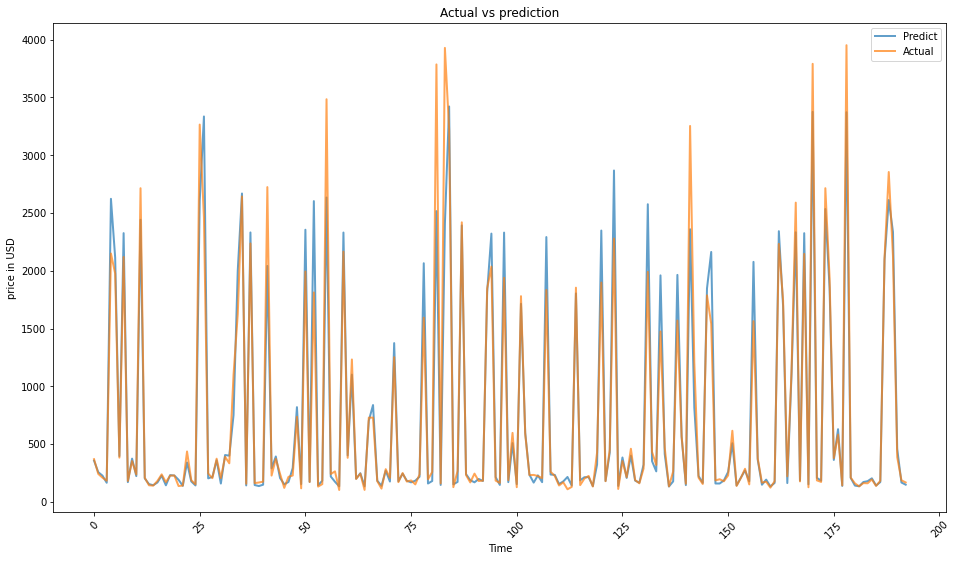

In [150]:
# Actual vs Prediction Accuracy Graphical View
plt.figure(figsize=(16, 9))
plt.plot(svr_pred, label='Predict', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('Actual vs prediction')
plt.ylabel('price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Linear Regression

In [151]:
# Fit LR Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [152]:
# Accuracy Check
lr_acc = lr.score(X_test, y_test)
print('Accuracy of LR model :', lr_acc)

Accuracy of LR model : 0.8789637085611208


In [153]:
# prediction Check
lr_pred = lr.predict(X_test)
lr_pred = pd.DataFrame(lr_pred)
print("Prediction Value :", lr_pred)

Prediction Value :                0
0     393.695787
1     299.311390
2     270.220297
3     204.605260
4    2482.220156
..           ...
188  2573.785686
189  2222.037536
190   487.333265
191   207.294267
192   181.964567

[193 rows x 1 columns]


In [154]:
# Actual Value
print("Actual Value :", pd.DataFrame(y_test))

Actual Value :                0
0     370.967590
1     243.525299
2     210.522598
3     184.690475
4    2150.040283
..           ...
188  2855.126465
189  2124.776611
190   389.019226
191   188.105515
192   169.697159

[193 rows x 1 columns]


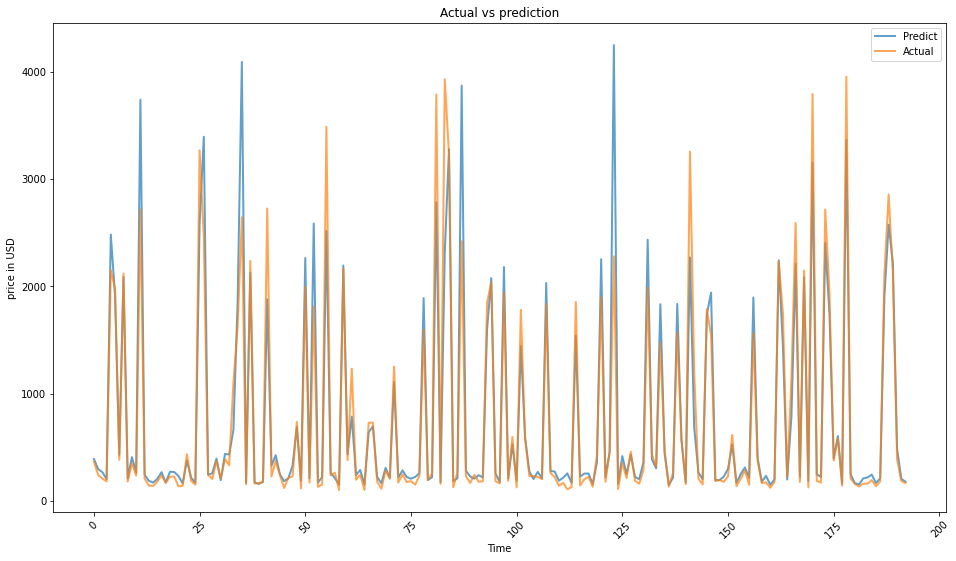

In [155]:
# Actual vs Prediction Accuracy Graphical View
plt.figure(figsize=(16, 9))
plt.plot(lr_pred, label='Predict', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('Actual vs prediction')
plt.ylabel('price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()